In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('iris.csv')
df.head()
# Flower classification dataset

,sepal_length,sepal_width,petal_length,petal_width,label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [71]:
df.shape

(149, 5)

# 1. Cleaning the data

In [72]:
missing_values = df.isnull().sum()
percentage_missing = (missing_values/len(df))*100
pd.DataFrame({'missing_values': missing_values,'percentage_missing': percentage_missing})

,missing_values,percentage_missing
sepal_length,0,0.0
sepal_width,0,0.0
petal_length,0,0.0
petal_width,0,0.0
label,0,0.0


In [73]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
label            object
dtype: object

In [74]:
df['label'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: label, dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   label         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# 2. Data Visualization

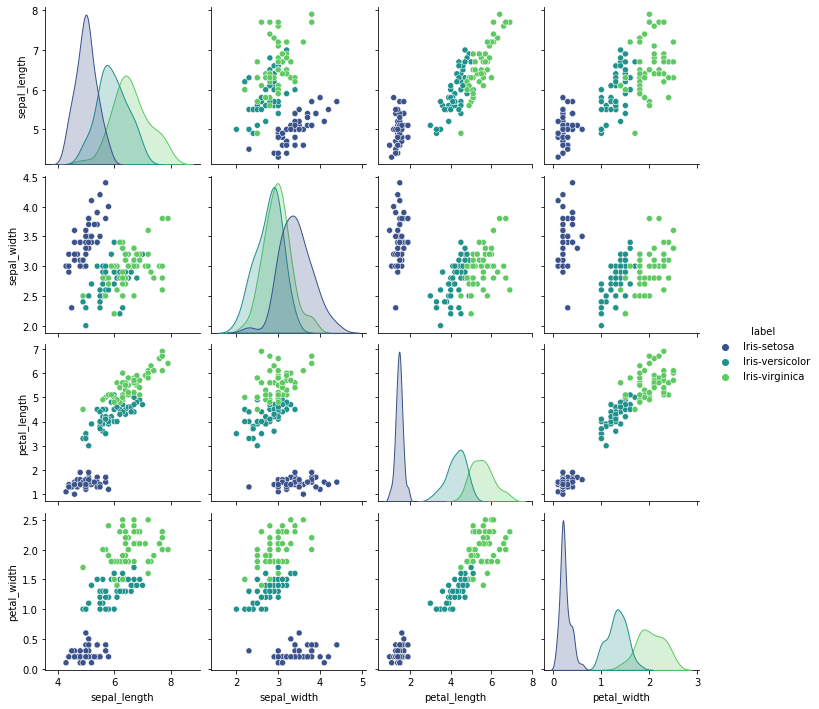

In [76]:
green_palette = sns.color_palette("viridis", n_colors=3)
sns.pairplot(df,hue='label',palette=green_palette)
plt.show()

<b>Following graphs show the distribution of features for every species</b>



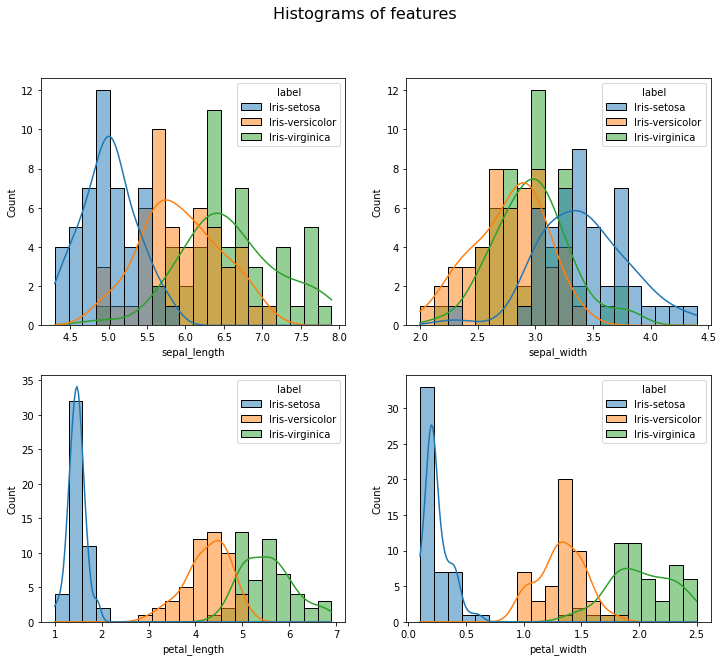

In [77]:
num_columns = list(df.select_dtypes(include=['float']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=df,x=num_columns[0],kde=True,bins=20,hue='label',ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of features', fontsize=16)
plt.show()

<b> Following graphs shows that the width is less tha the length for both petal and sepals </b>

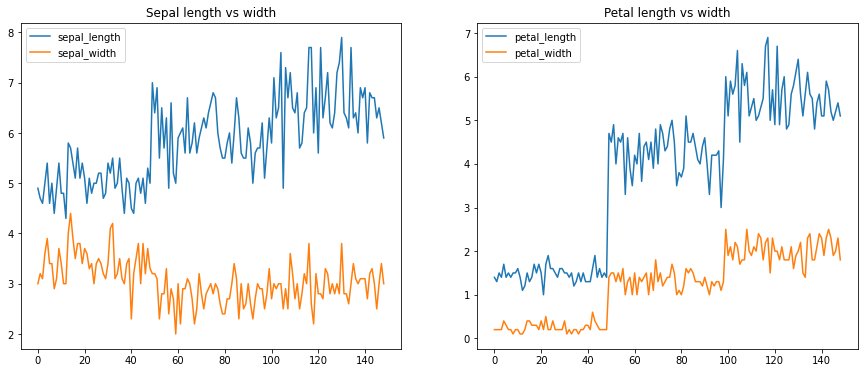

In [78]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].plot(df['sepal_length'])
ax[0].plot(df['sepal_width'])
ax[0].set_title('Sepal length vs width')
ax[0].legend(['sepal_length','sepal_width'])
ax[1].plot(df['petal_length'])
ax[1].plot(df['petal_width'])
ax[1].set_title('Petal length vs width')
ax[1].legend(['petal_length','petal_width'])
plt.show()

<b> Following graphs show the variability in the features for every feature </b>

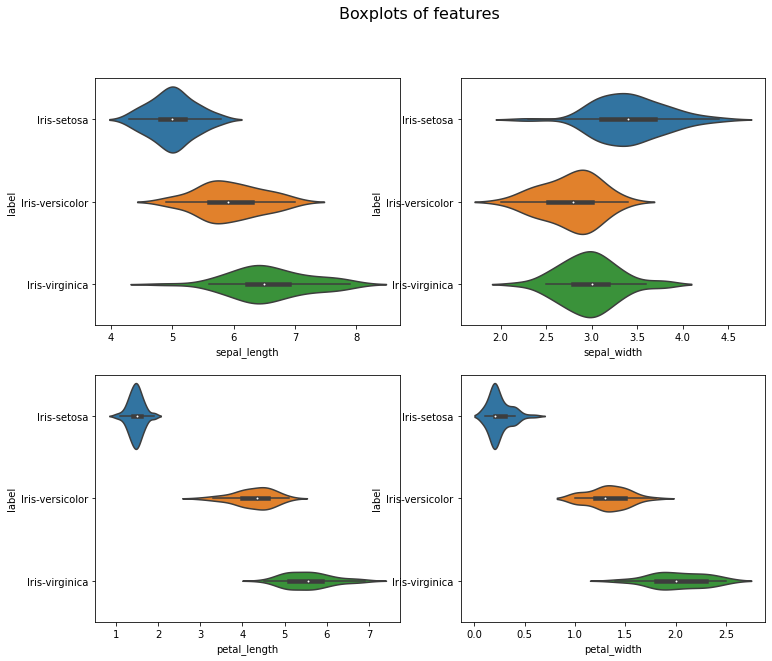

In [79]:
num_columns = list(df.select_dtypes(include=['float']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.violinplot(data=df,x=num_columns[0],y='label',ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of features', fontsize=16)
plt.show()

# 3. Model Building

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [85]:
df['label'] = LabelEncoder().fit_transform(df['label'])
X = df.drop(['label'],axis=1)
y = df['label']

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

<b> All the models are performing exceptionally because we have less testing data </b>

In [88]:
models = [dt,knn]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model)
    print('Accuracy score of model is {accuracy_score(y_test,y_pred)}')
    cm_m1 = confusion_matrix(y_test,y_pred)
    print(cm_m1)
    print(classification_report(y_test,y_pred)) 
    print('**************************************')

DecisionTreeClassifier()
Accuracy score of model is {accuracy_score(y_test,y_pred)}
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

**************************************
KNeighborsClassifier()
Accuracy score of model is {accuracy_score(y_test,y_pred)}
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg  